In [1]:
%matplotlib inline

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pylab as plt
import matplotlib.cm as mplcm
import matplotlib.colors as colors
from utils.embedding import *
from utils.geometry import *
from shapely.geometry import Point, LineString, Polygon, LinearRing

In [4]:
chip_1, chip_2, connections = data_prepare()
ans = []

In [5]:
new_points, subsequences = layers(chip_1, chip_2, connections)

In [6]:
internal, external, jump_lines = get_lines(connections, subsequences[0], subsequences[1], chip_1, chip_2, 1)

In [7]:
optimize_embedding(internal, external)

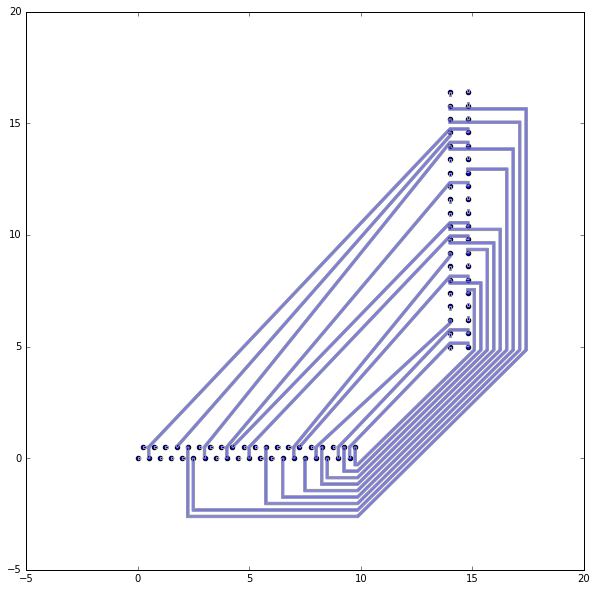

In [8]:
plot_all_lines(internal, 0.05)
plot_all_lines(external, 0.05)
plot_all_lines(jump_lines, 0.05)
plt.scatter(chip_1.values.T[0], chip_1.values.T[1])
plt.scatter(chip_2.values.T[0], chip_2.values.T[1])

In [9]:
all_lines = []

for line in internal:
    all_lines.append(line)
    
for line in external:
    all_lines.append(line)

In [10]:
print min_distance(internal)
print min_distance(external)
print min_distance(all_lines)

0.0168640629913
0.103359032924
0.00518916139696


In [11]:
print sum_length(internal)
print sum_length(external)
print sum_length(all_lines)
ans.append(sum_length(all_lines))

153.479416518
202.500725506
355.980142025


In [13]:
np.sum(ans)

355.98014202479038

In [14]:
external_polys = [line_to_poly(raw_line) for raw_line in external]

In [15]:
poly =  line_to_poly([(0, 0), (1, 0), (1, 1)], distance=0.00000001)

In [16]:
LinearRing(np.array(poly.exterior.xy).T).distance(Point(2, 0.5))

0.9999999900000002

In [19]:
plot_all_lines([[(0, 0), (1, 0), (1, 1)], [(2, 0.5), (3, 0.5)]], 0.0001)

In [20]:
plt.show()

In [30]:
from utils.embedding import embedding

In [19]:
LinearRing(np.array(line_to_poly(internal[-1]).exterior.xy).T).distance(Point(chip_2.values[13]))

0.024046578391980072

In [18]:
Point(chip_2.values[13]).area

0.0

In [15]:
line_to_poly(internal[-1]).exterior.xy

(array('d', [0.45000000000000007, 13.477933608101893, 14.850000000000101, 14.850000000000001, 14.75, 14.75, 13.522066391898106, 0.55, 0.55, 0.45, 0.45000000000000007]),
 array('d', [0.5193804680421552, 14.799999999999999, 14.799999999999999, 14.6, 14.6, 14.7, 14.7, 0.48061953195784485, 0.0, 0.0, 0.5193804680421552]))

In [10]:
line_to_poly(internal[-2]).exterior.xy

(array('d', [13.95, 13.95, 14.05, 14.049999999999883, 1.787570382791797, 1.712429617208203, 13.95]),
 array('d', [14.468837369526353, 14.6, 14.6, 14.431162630473512, 0.46700808679573375, 0.5329919132042662, 14.468837369526353]))

In [22]:
min_distance([internal[0], internal[-1]])

0.0

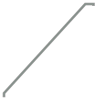

In [16]:
line_to_poly(internal[-1])

In [18]:
np.max(list(zip(*chip_1.values)[0]))

9.75

In [20]:
np.max(list(zip(*chip_2.values)[0]))

14.800000000000001

In [37]:
LinearRing(np.array(line_to_poly(internal[1]).exterior.xy).T).distance(
                LinearRing(np.array(line_to_poly(external[0]).exterior.xy).T))

0.017241379310345372

ValueError: all the input array dimensions except for the concatenation axis must match exactly

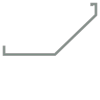

In [24]:
line_to_poly(external[1])

In [38]:
internal[1]

array([[  9.  ,   0.  ],
       [  9.  ,   0.  ],
       [  9.  ,   0.5 ],
       [ 14.  ,   5.75],
       [ 14.8 ,   5.75],
       [ 14.8 ,   5.6 ]])

In [54]:
min_distance([internal[1],internal[2]])

0.10052897184483285

In [52]:
min_distance([external[0], internal[1]])

0.09999999999999662

In [49]:
for lines in internal:
    aaa = external.tolist()
    aaa.append(lines.tolist())
    print min_distance(aaa)

0.0937204283533
0.101298642209
0.101298642209
0.1
0.101298642209
0.1
0.1
0.101298642209
0.1
0.101298642209
0.101298642209


In [17]:
aaa = external.tolist()

In [18]:
aaa.append(internal[1].tolist())

In [19]:
min_distance(aaa)

0.09482758620689623

In [20]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]

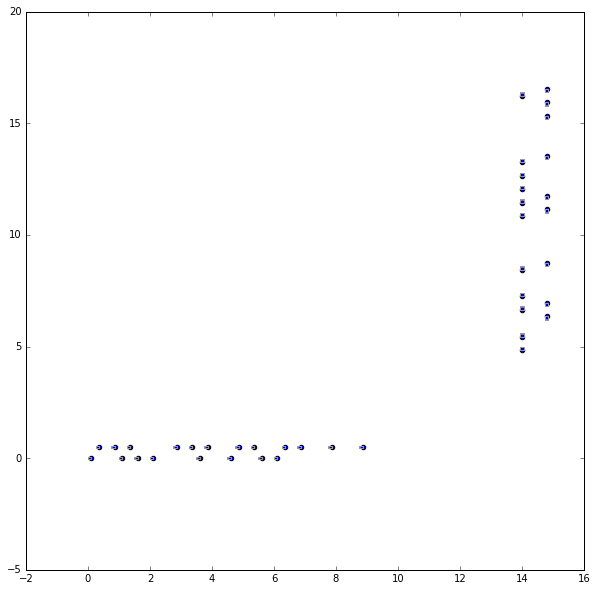

In [21]:
aaa = np.array(get_jumps(connections, subsequences[0], subsequences[1], chip_1, chip_2, 1)).T
plot_all_lines(jump_lines, 0.05)
plt.scatter(aaa[0], aaa[1])

In [30]:
len(subsequences)

8

In [14]:
aaa.shape

(2, 40)

In [15]:
subsequences

[[20, 21, 2, 25, 7, 28, 29, 32, 35, 16, 36],
 [24, 5, 27, 8, 9, 33, 15, 17, 18],
 [0, 22, 3, 4, 30],
 [1, 6, 26, 10, 11],
 [13, 14, 37, 38, 19],
 [31, 12],
 [34, 39],
 [23]]

In [25]:
connections

,0,1
0,11,0
1,32,1
2,16,2
3,22,3
4,21,4
5,38,5
6,29,6
7,14,7
8,36,8
9,15,9


In [25]:
np.array(get_jumps(connections, subsequences[0], subsequences[1], chip_1, chip_2, 1))

array([[  5.61000000e+00,   0.00000000e+00],
       [  1.40000000e+01,   4.85000000e+00],
       [  6.36000000e+00,   5.00000000e-01],
       [  1.40000000e+01,   5.45000000e+00],
       [  7.86000000e+00,   5.00000000e-01],
       [  1.48000000e+01,   1.35500000e+01],
       [  1.36000000e+00,   5.00000000e-01],
       [  1.40000000e+01,   6.65000000e+00],
       [  8.60000000e-01,   5.00000000e-01],
       [  1.40000000e+01,   7.25000000e+00],
       [  6.11000000e+00,   0.00000000e+00],
       [  1.48000000e+01,   1.53500000e+01],
       [  4.86000000e+00,   5.00000000e-01],
       [  1.40000000e+01,   8.45000000e+00],
       [  3.61000000e+00,   0.00000000e+00],
       [  1.48000000e+01,   1.65500000e+01],
       [  1.61000000e+00,   0.00000000e+00],
       [  1.40000000e+01,   1.08500000e+01],
       [  1.11000000e+00,   0.00000000e+00],
       [  1.40000000e+01,   1.14500000e+01],
       [  2.11000000e+00,   0.00000000e+00],
       [  1.40000000e+01,   1.20500000e+01],
       [  